In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df = pd.read_csv('outliers_2.csv')

In [7]:
df.shape

(3573, 24)

In [8]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8,360.333333
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38,552.500000
2,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49,292.500000
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174,665.000000
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,1,0,0,0,159,266.000000


In [9]:
df.isna().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1019
agePossession             0
super_built_up_area    1698
built_up_area          1970
carpet_area            1729
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

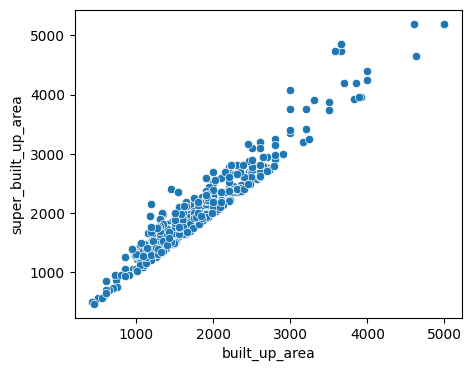

In [15]:
plt.figure(figsize=(5,4))
sns.scatterplot(x = df['built_up_area'],y = df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

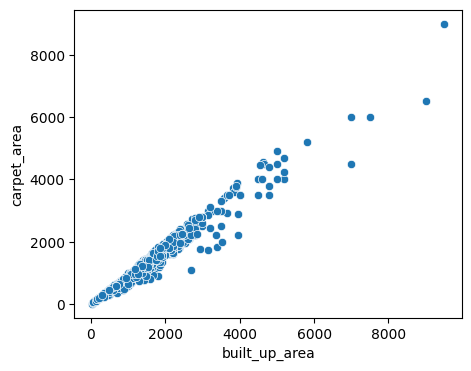

In [16]:
plt.figure(figsize=(5,4))
sns.scatterplot(x = df['built_up_area'],y = df['carpet_area'])

In [18]:
(df['super_built_up_area'].isnull())&(df['built_up_area'].isnull())&(df['carpet_area'].isnull())

0       False
1       False
2       False
3       False
4       False
        ...  
3568    False
3569    False
3570    False
3571    False
3572    False
Length: 3573, dtype: bool

In [21]:
c_df = df[~((df['super_built_up_area'].isnull())|(df['built_up_area'].isnull())|(df['carpet_area'].isnull()))]

In [22]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174,665.000000
16,flat,ss the leaf,sector 85,1.09,6667.0,1635.0,Super Built up area 1640(152.36 sq.m.)Built Up...,2,2,3,9.0,South-West,Relatively New,1640.0,1638.0,1635.0,0,0,1,0,0,0,174,817.500000
17,flat,capital residences 360,sector 70a,1.15,11500.0,1000.0,Super Built up area 1450(134.71 sq.m.)Built Up...,2,2,3,4.0,East,New Property,1450.0,1400.0,1000.0,0,0,0,1,0,0,132,500.000000
32,flat,emaar mgf the palm drive,sector 66,3.50,15909.0,2200.0,Super Built up area 2200(204.39 sq.m.)Built Up...,3,3,3,7.0,North-East,Moderately Old,2200.0,2125.0,2000.0,0,1,1,0,0,1,149,733.333333
34,flat,dlf the skycourt,sector 86,1.54,9222.0,1670.0,Super Built up area 1929(179.21 sq.m.)Built Up...,3,3,3+,15.0,North-West,Relatively New,1929.0,1780.0,1670.0,0,1,0,0,0,0,174,556.666667


In [25]:
super_to_built_up_ratio = (c_df['super_built_up_area']/c_df['built_up_area']).median()

In [26]:
carpet_to_built_up_ratio = (c_df['carpet_area']/c_df['built_up_area']).median()

In [27]:
print(super_to_built_up_ratio)
print(carpet_to_built_up_ratio)

1.105263157894737
0.9


In [28]:
sbc_df = df[(~df['super_built_up_area'].isnull()) & (df['built_up_area'].isna()) & (~(df['carpet_area'].isna()))] 

In [29]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8,360.333333
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,1,0,0,0,159,266.000000
39,flat,corona optus,sector 37,1.25,7176.0,1742.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3,3,3,2.0,North-West,Relatively New,1735.0,NaN,1400.0,1,0,0,0,0,0,49,580.666667
41,flat,m3m merlin,sector 67,2.80,13679.0,2047.0,Super Built up area 2047(190.17 sq.m.)Carpet a...,3,3,3,5.0,North-East,Moderately Old,2047.0,NaN,1880.0,0,1,0,0,0,2,26,682.333333
46,flat,smart world orchard,sector 61,2.10,13752.0,1527.0,Super Built up area 1549(143.91 sq.m.)Carpet a...,3,2,3,3.0,South,Under Construction,1549.0,NaN,1500.0,0,0,0,0,0,0,146,509.000000


In [31]:
sbc_df['built_up_area'] = sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105)+(sbc_df['carpet_area']/0.9)/2)))

C:\Users\debas\AppData\Local\Temp\ipykernel_10560\2594085411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'] = sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105)+(sbc_df['carpet_area']/0.9)/2)))


In [32]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,1339.0,650.0,0,0,0,0,0,0,8,360.333333
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,868.0,532.0,0,0,1,0,0,0,159,266.000000
39,flat,corona optus,sector 37,1.25,7176.0,1742.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3,3,3,2.0,North-West,Relatively New,1735.0,2348.0,1400.0,1,0,0,0,0,0,49,580.666667
41,flat,m3m merlin,sector 67,2.80,13679.0,2047.0,Super Built up area 2047(190.17 sq.m.)Carpet a...,3,3,3,5.0,North-East,Moderately Old,2047.0,2897.0,1880.0,0,1,0,0,0,2,26,682.333333
46,flat,smart world orchard,sector 61,2.10,13752.0,1527.0,Super Built up area 1549(143.91 sq.m.)Carpet a...,3,2,3,3.0,South,Under Construction,1549.0,2235.0,1500.0,0,0,0,0,0,0,146,509.000000


In [33]:
sbc_df.isnull().sum()

property_type           0
society                 0
sector                  0
price                   0
price_per_sqft          0
area                    0
areaWithType            0
bedRoom                 0
bathroom                0
balcony                 0
floorNum                0
facing                 68
agePossession           0
super_built_up_area     0
built_up_area           0
carpet_area             0
study room              0
servant room            0
store room              0
pooja room              0
others                  0
furnishing_type         0
luxury_score            0
area_room_ratio         0
dtype: int64

In [34]:
df.update(sbc_df)

In [35]:
df.isna().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1019
agePossession             0
super_built_up_area    1698
built_up_area          1549
carpet_area            1729
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [36]:
sb_df = df[(~df['super_built_up_area'].isnull()) & (df['built_up_area'].isna()) & ((df['carpet_area'].isna()))] 

In [37]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
5,flat,paras quartier,gwal pahari,7.50,14019.0,5350.0,Super Built up area 5350(497.03 sq.m.),4,4,3+,20.0,North-East,New Property,5350.0,NaN,NaN,0,1,0,1,1,1,49,1337.500000
6,flat,experion the heartsong,sector 108,2.00,8554.0,2338.0,Super Built up area 2338(217.21 sq.m.),3,3,3+,14.0,East,Relatively New,2338.0,NaN,NaN,0,1,0,0,0,0,95,779.333333
7,flat,adani m2k oyster grande,sector 102,1.90,9104.0,2087.0,Super Built up area 1889(175.49 sq.m.),3,4,3,8.0,North-East,Relatively New,1889.0,NaN,NaN,0,1,0,0,0,0,165,695.666667
12,flat,ats tourmaline,sector 109,2.25,8704.0,2585.0,Super Built up area 2585(240.15 sq.m.),3,4,3,14.0,North-East,Relatively New,2585.0,NaN,NaN,0,1,0,0,0,0,101,861.666667
15,flat,bestech park view sanskruti,sector 92,1.55,7568.0,2048.0,Super Built up area 1995(185.34 sq.m.),3,4,3,16.0,South,Relatively New,1995.0,NaN,NaN,0,1,0,0,0,1,60,682.666667


In [39]:
sb_df['built_up_area'] = sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105))

C:\Users\debas\AppData\Local\Temp\ipykernel_10560\3536697853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'] = sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105))


In [40]:
df.update(sb_df)

In [41]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1019
agePossession             0
super_built_up_area    1698
built_up_area           674
carpet_area            1729
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [42]:
cp_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isna()) & ((~df['carpet_area'].isna()))] 

In [43]:
cp_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38,552.50
11,flat,dlf regency park,sector 28,1.60,14545.0,1100.0,Carpet area: 1100 (102.19 sq.m.),2,2,2,3.0,North,Relatively New,NaN,NaN,1100.0,0,0,0,0,0,0,52,550.00
13,flat,emaar mgf emerald floors premier,sector 65,2.77,14025.0,1975.0,Carpet area: 1975 (183.48 sq.m.),4,4,3+,3.0,North-East,Relatively New,NaN,NaN,1975.0,1,1,0,0,0,2,174,493.75
19,flat,afnhb jalvayu vihar,sector 30,0.85,12859.0,661.0,Carpet area: 661 (61.41 sq.m.),2,2,1,2.0,West,Old Property,NaN,NaN,661.0,0,0,0,0,1,1,49,330.50
25,flat,chanderlok society,sector 28,0.90,7235.0,1244.0,Carpet area: 1244 (115.57 sq.m.),4,2,3+,1.0,NaN,Old Property,NaN,NaN,1244.0,0,0,0,0,0,0,0,311.00


In [46]:
cp_df['built_up_area'] = cp_df['built_up_area'].fillna(round(cp_df['carpet_area']/0.9))

C:\Users\debas\AppData\Local\Temp\ipykernel_10560\2411059292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp_df['built_up_area'] = cp_df['built_up_area'].fillna(round(cp_df['carpet_area']/0.9))


In [47]:
df.update(cp_df)

In [48]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1019
agePossession             0
super_built_up_area    1698
built_up_area             0
carpet_area            1729
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

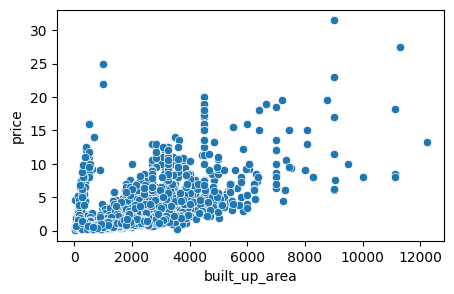

In [51]:
plt.figure(figsize=(5,3))
sns.scatterplot(x = df['built_up_area'],y = df['price'])

In [53]:
anomly = df[(df['built_up_area']<2000) & (df['price']>2.5)][['price','area','built_up_area']]

In [54]:
anomly.head()

,price,area,built_up_area
9,4.50,1350.0,1350.0
36,8.25,2160.0,300.0
42,5.50,1800.0,1800.0
43,2.58,2200.0,1991.0
59,5.75,2430.0,260.0


In [55]:
anomly.shape

(261, 3)

In [56]:
anomly['built_up_area'] = anomly['area']

In [57]:
df.update(anomly)

<Axes: xlabel='built_up_area', ylabel='price'>

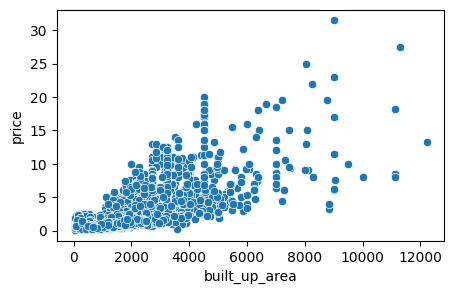

In [61]:
plt.figure(figsize=(5,3))
sns.scatterplot(x= df['built_up_area'],y = df['price'])

In [62]:
new_df = df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'])

In [63]:
new_df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,2.0,NaN,New Property,1339.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,4.0,NaN,New Property,1226.0,1,1,0,0,0,0,38
2,flat,breez global hill view,sohna road,0.32,5470.0,2,2,1,17.0,NaN,New Property,1000.0,0,0,0,0,0,0,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3,4,3+,10.0,North-West,Relatively New,1615.0,0,1,0,0,1,1,174
4,flat,suncity avenue,sector 102,0.48,9023.0,2,2,1,5.0,North-East,Relatively New,868.0,0,0,1,0,0,0,159


In [64]:
new_df.isna().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1019
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [65]:
new_df[new_df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
503,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,0,0
771,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
1298,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
1457,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,0,21
1470,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,0,0
1959,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
2061,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,0,88
2170,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Moderately Old,4635.0,0,0,0,0,0,0,0
2286,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,Relatively New,5200.0,0,1,1,1,0,1,114
2454,house,dlf new town heights,sector 86,2.47,7719.0,4,4,3+,NaN,West,Moderately Old,2800.0,0,1,0,1,0,1,130


In [66]:
new_df[new_df['property_type'] == 'house']['floorNum'].median()

np.float64(2.0)

In [67]:
new_df['floorNum'].fillna(2,inplace = True)

C:\Users\debas\AppData\Local\Temp\ipykernel_10560\551006709.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['floorNum'].fillna(2,inplace = True)


In [68]:
new_df.isna().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1019
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

<Axes: ylabel='count'>

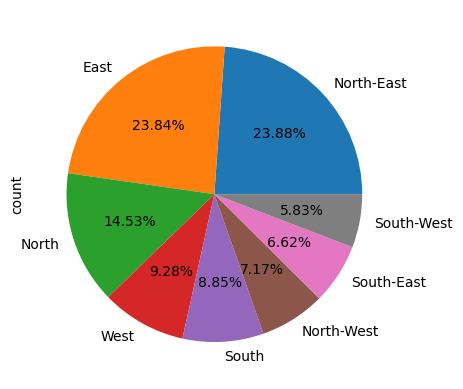

In [71]:
new_df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [72]:
new_df.drop(columns=['facing'],inplace = True)

In [73]:
new_df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,2.0,New Property,1339.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38
2,flat,breez global hill view,sohna road,0.32,5470.0,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174
4,flat,suncity avenue,sector 102,0.48,9023.0,2,2,1,5.0,Relatively New,868.0,0,0,1,0,0,0,159


In [74]:
new_df.isna().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [77]:
new_df[new_df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2551,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [100]:
new_df.drop(index =2551,inplace = True)

In [80]:
new_df['agePossession'].value_counts()

agePossession
Relatively New        1609
New Property           560
Moderately Old         551
Old Property           294
Undefined              294
Under Construction     264
Name: count, dtype: int64

In [81]:
new_df[new_df['agePossession']=='Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,house,independent,sector 109,1.55,6568.0,3,2,0,1.0,Undefined,2360.0,0,0,0,0,0,0,0
33,house,greenopolis,sector 89,0.70,5397.0,2,2,2,14.0,Undefined,1297.0,0,0,0,0,0,0,0
49,flat,smart world gems,sector 89,1.71,12000.0,3,2,0,3.0,Undefined,1423.0,0,0,0,0,0,0,45
71,flat,rof aalayas,sector 102,0.45,6000.0,1,1,2,6.0,Undefined,750.0,0,0,0,0,0,0,0
75,house,bhim garh kheri,sector 3,1.50,7576.0,7,2,0,1.0,Undefined,1980.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3515,flat,raheja vedaanta,sector 108,0.70,4522.0,2,2,3,1.0,Undefined,1548.0,0,0,0,0,0,0,0
3520,flat,signature global city,sector 37d,1.10,9839.0,2,2,2,4.0,Undefined,1242.0,0,0,0,0,0,0,59
3526,house,independent,sector 21,0.45,8411.0,3,2,1,1.0,Undefined,594.0,0,0,0,0,0,0,0
3538,flat,sidhartha ncr one,sector 95,0.57,4179.0,2,2,2,10.0,Undefined,1364.0,0,0,0,0,0,0,0


In [87]:

def handling_undefined(row):
    if row['agePossession'] == 'Undefined':
        mode_value = new_df[(new_df['sector'] == row['sector']) & (new_df['property_type'] == row['property_type'])]['agePossession'].mode()
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [88]:
new_df['agePossession'] = new_df.apply(handling_undefined,axis = 1)

In [89]:
new_df['agePossession'].value_counts()

agePossession
Relatively New        1715
New Property           601
Moderately Old         598
Old Property           328
Under Construction     278
Undefined               52
Name: count, dtype: int64

In [90]:

def handling_undefined_2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = new_df[(new_df['sector'] == row['sector'])]['agePossession'].mode()
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [93]:
new_df['agePossession'] = new_df.apply(handling_undefined_2,axis = 1)

In [94]:
new_df['agePossession'].value_counts()

agePossession
Relatively New        1730
Moderately Old         605
New Property           602
Old Property           331
Under Construction     278
Undefined               26
Name: count, dtype: int64

In [95]:

def handling_undefined_3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = new_df[(new_df['property_type'] == row['property_type'])]['agePossession'].mode()
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [96]:
new_df['agePossession'] = new_df.apply(handling_undefined_3,axis = 1)

In [97]:
new_df['agePossession'].value_counts()

agePossession
Relatively New        1732
Moderately Old         629
New Property           602
Old Property           331
Under Construction     278
Name: count, dtype: int64

In [99]:
new_df[new_df['society'].isna()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2551,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [101]:
new_df.isna().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [103]:
new_df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,2.0,New Property,1339.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38
2,flat,breez global hill view,sohna road,0.32,5470.0,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174
4,flat,suncity avenue,sector 102,0.48,9023.0,2,2,1,5.0,Relatively New,868.0,0,0,1,0,0,0,159


In [104]:
train_df = new_df.drop(columns=['society','price_per_sqft'])

In [105]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3,2,2,2.0,New Property,1339.0,0,0,0,0,0,0,8
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,868.0,0,0,1,0,0,0,159


In [109]:
train_df.to_csv('corrected_data.csv',index = False)